In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/traffic-crashes/Traffic_Crashes_-_People_20241006.csv
/kaggle/input/traffic-crashes/Traffic_Crashes_-_Crashes_20241006.csv
/kaggle/input/traffic-crashes/Traffic_Crashes_-_Vehicles_20241009.csv


In [2]:
# Import other dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

Showing the top 5 rows of each dataset

1. **Crashes Dataset**

In [3]:
crashes_df = pd.read_csv('/kaggle/input/traffic-crashes/Traffic_Crashes_-_Crashes_20241006.csv')

crashes_df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


2. **People Dataset**

In [4]:
people_df = pd.read_csv('/kaggle/input/traffic-crashes/Traffic_Crashes_-_People_20241006.csv', low_memory=False)

people_df.head()

,PERSON_ID,PERSON_TYPE,CRASH_RECORD_ID,VEHICLE_ID,CRASH_DATE,SEAT_NO,CITY,STATE,ZIPCODE,SEX,...,EMS_RUN_NO,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,CELL_PHONE_USE
0,O749947,DRIVER,81dc0de2ed92aa62baccab641fa377be7feb1cc47e6554...,834816.0,09/28/2019 03:30:00 AM,NaN,CHICAGO,IL,60651,M,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
1,O871921,DRIVER,af84fb5c8d996fcd3aefd36593c3a02e6e7509eeb27568...,827212.0,04/13/2020 10:50:00 PM,NaN,CHICAGO,IL,60620,M,...,NaN,NONE,NOT OBSCURED,NORMAL,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
2,O10018,DRIVER,71162af7bf22799b776547132ebf134b5b438dcf3dac6b...,9579.0,11/01/2015 05:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,IMPROPER BACKING,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
3,O10038,DRIVER,c21c476e2ccc41af550b5d858d22aaac4ffc88745a1700...,9598.0,11/01/2015 08:00:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN
4,O10039,DRIVER,eb390a4c8e114c69488f5fb8a097fe629f5a92fd528cf4...,9600.0,11/01/2015 10:15:00 AM,NaN,NaN,NaN,NaN,X,...,NaN,UNKNOWN,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TEST NOT OFFERED,NaN,NaN


3. **Vehicle Dataset**

In [5]:
vehicle_df = pd.read_csv('/kaggle/input/traffic-crashes/Traffic_Crashes_-_Vehicles_20241009.csv')

vehicle_df.head()

,CRASH_UNIT_ID,CRASH_RECORD_ID,CRASH_DATE,UNIT_NO,UNIT_TYPE,NUM_PASSENGERS,VEHICLE_ID,CMRC_VEH_I,MAKE,MODEL,...,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT,VEHICLE_CONFIG,CARGO_BODY_TYPE,LOAD_TYPE,HAZMAT_OUT_OF_SERVICE_I,MCS_OUT_OF_SERVICE_I,HAZMAT_CLASS
0,1717556,7b1763088507f77e0e552c009a6bf89a4d6330c7527706...,12/06/2023 03:24:00 PM,1,DRIVER,NaN,1634931.0,NaN,NISSAN,SENTRA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1717574,2603ff5a88f0b9b54576934c5ed4e4a64e8278e005687b...,12/06/2023 04:00:00 PM,2,DRIVER,NaN,1634978.0,NaN,CHRYSLER,SEBRING,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1717579,a52ef70e33d468b855b5be44e8638a564434dcf99c0edf...,12/06/2023 04:30:00 PM,1,DRIVER,NaN,1634948.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1720118,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,1,DRIVER,NaN,1637401.0,NaN,TOYOTA,RAV4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1720119,609055f4b1a72a44d6ec40ba9036cefd7c1287a755eb6c...,12/10/2023 12:12:00 PM,2,DRIVER,NaN,1637408.0,NaN,SUBARU,OUTBACK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Exploration**

We are first going to create 2 functions:
* One that summarises missing values
* Another for dropping any column in our datasets whose missing values are above our set threshold 75%

In [6]:
def missing_values_summary(df):
    # Calculate the number of missing values and their percentage
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / df.shape[0]) * 100
    
    # Create a DataFrame with the results
    missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

    # Filter out columns with no missing values and sort by 'Missing Values'
    missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

    return missing_data

In [7]:
def drop_high_missing_columns(df, threshold=75):
    # Calculate the percentage of missing values
    missing_percentage = (df.isnull().sum() / df.shape[0]) * 100

    # Filter columns with missing percentage greater than the threshold
    columns_to_drop = missing_percentage[missing_percentage > threshold].index

    # Drop the columns
    df_dropped = df.drop(columns=columns_to_drop)

    return df_dropped

#### **Exploring Crashes Dataset**

Checking the columns we have in our `Crashes` dataset

In [8]:
crashes_df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [9]:
# Check the number of rows and columns 
crashes_df.shape

(880093, 48)

From the above output, we can note that we have 880093 rows and 48 columns

In [10]:
crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880093 entries, 0 to 880092
Data columns (total 48 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                880093 non-null  object 
 1   CRASH_DATE_EST_I               65222 non-null   object 
 2   CRASH_DATE                     880093 non-null  object 
 3   POSTED_SPEED_LIMIT             880093 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         880093 non-null  object 
 5   DEVICE_CONDITION               880093 non-null  object 
 6   WEATHER_CONDITION              880093 non-null  object 
 7   LIGHTING_CONDITION             880093 non-null  object 
 8   FIRST_CRASH_TYPE               880093 non-null  object 
 9   TRAFFICWAY_TYPE                880093 non-null  object 
 10  LANE_CNT                       199017 non-null  float64
 11  ALIGNMENT                      880093 non-null  object 
 12  ROADWAY_SURFACE_COND          

Using our function to check on columns with missing values in descending order

In [11]:
missing_values_summary(crashes_df)

,Missing Values,Percentage
WORKERS_PRESENT_I,878817,99.855015
DOORING_I,877309,99.683670
WORK_ZONE_TYPE,876260,99.564478
WORK_ZONE_I,875130,99.436082
PHOTOS_TAKEN_I,868157,98.643780
STATEMENTS_TAKEN_I,859949,97.711151
NOT_RIGHT_OF_WAY_I,839883,95.431165
CRASH_DATE_EST_I,814871,92.589192
LANE_CNT,681076,77.386822
INTERSECTION_RELATED_I,678237,77.064242


We have features with more than 75% missing values and for this reason they are going to be dropped and after which, all the null values are also going to be dropped so that we remain with clean `Crashes` dataset

Let's look at the statistical summary

In [12]:
# Statistical summary
crashes_df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,880093.000000,1.990170e+05,880093.000000,880088.000000,880093.000000,878152.000000,878152.000000,878152.000000,878152.000000,878152.000000,878152.000000,878152.0,880093.000000,880093.000000,880093.000000,873822.000000,873822.000000
mean,28.418012,1.332970e+01,3687.502824,1244.779543,2.035159,0.193529,0.001189,0.019830,0.108621,0.063889,2.001315,0.0,13.204356,4.121138,6.641602,41.855119,-87.673679
std,6.121844,2.961542e+03,2880.803121,705.000740,0.452488,0.571493,0.037376,0.164983,0.425074,0.324960,1.157131,0.0,5.572912,1.981148,3.363514,0.334180,0.678922
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1250.000000,715.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.783061,-87.721824
50%,30.000000,2.000000e+00,3201.000000,1212.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874952,-87.674226
75%,30.000000,4.000000e+00,5564.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,9.000000,41.924519,-87.633513
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


Dropping features with missing values above 75% threshold

In [13]:
crashes_df = drop_high_missing_columns(crashes_df, threshold=75)

Having a look at the missing values summary after dropping the features

In [14]:
missing_values_summary(crashes_df)

,Missing Values,Percentage
HIT_AND_RUN_I,604145,68.645586
REPORT_TYPE,27030,3.071266
LOCATION,6271,0.712538
LONGITUDE,6271,0.712538
LATITUDE,6271,0.712538
MOST_SEVERE_INJURY,1955,0.222136
INJURIES_FATAL,1941,0.220545
INJURIES_TOTAL,1941,0.220545
INJURIES_NO_INDICATION,1941,0.220545
INJURIES_REPORTED_NOT_EVIDENT,1941,0.220545


From the output. It is only `HIT_AND_RUN_I` that have higher percentage (**68.65%**). Since it isn't informative and won't be relevant to our model, we are going to drop.

In [15]:
crashes_df = crashes_df.drop(columns=['HIT_AND_RUN_I'], axis=1)

Dropping the Null values because it will be of negligible impact

In [16]:
crashes_df = crashes_df.dropna()

Re-check if there is still any missing values in our `Crashes` dataset

In [17]:
crashes_df.isna().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NO

There is no missing values

In [18]:
crashes_df.shape

(845026, 37)

After the data cleaning process for `Crashes` dataset, we are reamining with 845026 rows and 37 columns

#### **Exploring People Dataset**

Checking the columns of `People` dataset

In [19]:
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')

In [20]:
# Checking the number of columns and rows
people_df.shape

(1932814, 29)

From the output, we have 1932814 rows and 29 columns

In [21]:
# Dataset information
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1932814 entries, 0 to 1932813
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   PERSON_ID              object 
 1   PERSON_TYPE            object 
 2   CRASH_RECORD_ID        object 
 3   VEHICLE_ID             float64
 4   CRASH_DATE             object 
 5   SEAT_NO                float64
 6   CITY                   object 
 7   STATE                  object 
 8   ZIPCODE                object 
 9   SEX                    object 
 10  AGE                    float64
 11  DRIVERS_LICENSE_STATE  object 
 12  DRIVERS_LICENSE_CLASS  object 
 13  SAFETY_EQUIPMENT       object 
 14  AIRBAG_DEPLOYED        object 
 15  EJECTION               object 
 16  INJURY_CLASSIFICATION  object 
 17  HOSPITAL               object 
 18  EMS_AGENCY             object 
 19  EMS_RUN_NO             object 
 20  DRIVER_ACTION          object 
 21  DRIVER_VISION          object 
 22  PHYSICAL_CONDITION

Check on the missing values summary in descending order

In [22]:
missing_values_summary(people_df)

,Missing Values,Percentage
CELL_PHONE_USE,1931654,99.939984
BAC_RESULT VALUE,1930698,99.890522
EMS_RUN_NO,1900336,98.319652
PEDPEDAL_VISIBILITY,1895221,98.055012
PEDPEDAL_ACTION,1895153,98.051494
PEDPEDAL_LOCATION,1895153,98.051494
EMS_AGENCY,1738265,89.934417
HOSPITAL,1617886,83.706244
SEAT_NO,1541715,79.765306
DRIVERS_LICENSE_CLASS,991106,51.277878


In [23]:
# Statistical summary
people_df.describe()

,VEHICLE_ID,SEAT_NO,AGE,BAC_RESULT VALUE
count,1.893365e+06,391099.000000,1.369426e+06,2116.000000
mean,9.094490e+05,4.164818,3.791410e+01,0.170747
std,5.288295e+05,2.216350,1.708989e+01,0.103180
min,2.000000e+00,1.000000,-1.770000e+02,0.000000
25%,4.512990e+05,3.000000,2.500000e+01,0.120000
50%,9.004650e+05,3.000000,3.500000e+01,0.170000
75%,1.369158e+06,5.000000,5.000000e+01,0.220000
max,1.830378e+06,12.000000,1.100000e+02,1.000000


Drop columns whose missing values are above 75% threshold

In [24]:
people_df = drop_high_missing_columns(people_df, threshold=75)

Re-check the missing values summary after dropping the columns

In [25]:
missing_values_summary(people_df)

,Missing Values,Percentage
DRIVERS_LICENSE_CLASS,991106,51.277878
DRIVERS_LICENSE_STATE,801540,41.470105
ZIPCODE,639846,33.104375
AGE,563388,29.148589
CITY,526566,27.243491
STATE,505205,26.138314
DRIVER_VISION,395153,20.444440
DRIVER_ACTION,394562,20.413863
BAC_RESULT,393617,20.364970
PHYSICAL_CONDITION,393509,20.359383


Dropping irrelevant columns which are also less informative 

In [26]:
people_df = people_df.drop(columns=['DRIVERS_LICENSE_CLASS', 'DRIVERS_LICENSE_STATE', 'ZIPCODE'], axis=1)

Creating a function that can help in converting negative ages to -1 which is our current placeholder

In [27]:
def replace_negative_ages_with_nan(df, age_column='AGE'):
   
    df[age_column] = df[age_column].apply(lambda x: -1 if x < 0 else x)
    return df

people_df = replace_negative_ages_with_nan(people_df, age_column='AGE')

In [28]:
# Check on the number of columns and rows
people_df.shape

(1932814, 17)

We have 1932814 rows and 17 columns after the data cleaning process for the `People` dataset

In [29]:
people_df.columns

Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'VEHICLE_ID',
       'CRASH_DATE', 'CITY', 'STATE', 'SEX', 'AGE', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION',
       'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

#### **Exploring Vehicle Dataset**

Check the columns in `Vehicle` dataset

In [30]:
vehicle_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
       'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I',
       'TRAILER1_

In [31]:
# Cheeck the number of columns and rows
vehicle_df.shape

(1797799, 71)

from the above output, we have 1797799 rows and 71 columns

In [32]:
# Data information
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797799 entries, 0 to 1797798
Data columns (total 71 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   CRASH_UNIT_ID             int64  
 1   CRASH_RECORD_ID           object 
 2   CRASH_DATE                object 
 3   UNIT_NO                   int64  
 4   UNIT_TYPE                 object 
 5   NUM_PASSENGERS            float64
 6   VEHICLE_ID                float64
 7   CMRC_VEH_I                object 
 8   MAKE                      object 
 9   MODEL                     object 
 10  LIC_PLATE_STATE           object 
 11  VEHICLE_YEAR              float64
 12  VEHICLE_DEFECT            object 
 13  VEHICLE_TYPE              object 
 14  VEHICLE_USE               object 
 15  TRAVEL_DIRECTION          object 
 16  MANEUVER                  object 
 17  TOWED_I                   object 
 18  FIRE_I                    object 
 19  OCCUPANT_CNT              float64
 20  EXCEED_SPEED_LIMIT_I    

Let's look at the missing values summary for the `Vehicle` dataset

In [33]:
missing_values_summary(vehicle_df)

,Missing Values,Percentage
HAZMAT_REPORT_NO,1797798,99.999944
MCS_REPORT_NO,1797792,99.999611
HAZMAT_NAME,1797736,99.996496
TRAILER2_LENGTH,1797729,99.996106
WIDE_LOAD_I,1797638,99.991045
...,...,...
VEHICLE_USE,41925,2.332018
MANEUVER,41925,2.332018
TRAVEL_DIRECTION,41925,2.332018
OCCUPANT_CNT,41925,2.332018


In [34]:
# Statistical summary
vehicle_df.describe()

,CRASH_UNIT_ID,UNIT_NO,NUM_PASSENGERS,VEHICLE_ID,VEHICLE_YEAR,OCCUPANT_CNT,CMV_ID,TRAILER1_LENGTH,TRAILER2_LENGTH,TOTAL_VEHICLE_LENGTH,AXLE_CNT
count,1.797799e+06,1.797799e+06,266268.000000,1.755874e+06,1.476152e+06,1.755874e+06,18167.000000,2416.000000,70.000000,2936.000000,4435.000000
mean,9.614945e+05,3.666488e+00,1.471093,9.143192e+05,2.014236e+03,1.079378e+00,10131.107282,48.467715,44.271429,53.193120,9.568658
std,5.565258e+05,2.817703e+03,1.059615,5.283028e+05,1.377143e+02,7.823757e-01,5855.378574,20.651355,28.008240,31.252969,390.504878
min,2.000000e+00,0.000000e+00,1.000000,2.000000e+00,1.900000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.786945e+05,1.000000e+00,1.000000,4.571452e+05,2.007000e+03,1.000000e+00,4999.500000,45.000000,24.250000,35.000000,2.000000
50%,9.628840e+05,2.000000e+00,1.000000,9.125875e+05,2.013000e+03,1.000000e+00,10160.000000,53.000000,50.000000,53.000000,3.000000
75%,1.443742e+06,2.000000e+00,2.000000,1.371259e+06,2.017000e+03,1.000000e+00,15220.000000,53.000000,53.000000,66.000000,5.000000
max,1.923912e+06,3.778035e+06,59.000000,1.832862e+06,9.999000e+03,9.900000e+01,20212.000000,740.000000,123.000000,999.000000,26009.000000


Drop the columns with missing values above the 75% threshold

In [35]:
vehicle_df = drop_high_missing_columns(vehicle_df, threshold=75)

Re-check the missing values summary

In [36]:
missing_values_summary(vehicle_df)

,Missing Values,Percentage
AREA_01_I,1315796,73.189272
VEHICLE_YEAR,321647,17.891155
LIC_PLATE_STATE,202695,11.274620
FIRST_CONTACT_POINT,45068,2.506843
MODEL,42075,2.340362
MAKE,41930,2.332296
TRAVEL_DIRECTION,41925,2.332018
VEHICLE_ID,41925,2.332018
VEHICLE_DEFECT,41925,2.332018
VEHICLE_TYPE,41925,2.332018


`AREA_01_I` has highest percentage of missing values and since it is less informative, we going to drop it

In [37]:
vehicle_selected_df = vehicle_df[['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'UNIT_TYPE', 'VEHICLE_DEFECT', 
                                  'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 
                                  'OCCUPANT_CNT', 'FIRST_CONTACT_POINT', 'VEHICLE_YEAR']]


After that, we also going to remove all the Null values

In [38]:
vehicle_selected_df = vehicle_df.dropna()

Check if there is any missing values

In [39]:
vehicle_selected_df.isna().sum()

CRASH_UNIT_ID          0
CRASH_RECORD_ID        0
CRASH_DATE             0
UNIT_NO                0
UNIT_TYPE              0
VEHICLE_ID             0
MAKE                   0
MODEL                  0
LIC_PLATE_STATE        0
VEHICLE_YEAR           0
VEHICLE_DEFECT         0
VEHICLE_TYPE           0
VEHICLE_USE            0
TRAVEL_DIRECTION       0
MANEUVER               0
OCCUPANT_CNT           0
AREA_01_I              0
FIRST_CONTACT_POINT    0
dtype: int64

There is no missing values

In [40]:
vehicle_selected_df.shape

(421055, 18)

The `Vehicle` dataset after the data cleaning process, there are 1428169 rows and 17 columns

In [41]:
vehicle_selected_df.columns

Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'LIC_PLATE_STATE',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'AREA_01_I',
       'FIRST_CONTACT_POINT'],
      dtype='object')

In [42]:
crashes_ = crashes_df.drop(['CRASH_DATE', 'REPORT_TYPE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 
                            'INJURIES_UNKNOWN', 'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1)

In [43]:
# display numerical variables

crashes_eda = [col for col in crashes_.columns if crashes_[col].dtypes != 'O']

crashes_eda

['POSTED_SPEED_LIMIT',
 'BEAT_OF_OCCURRENCE',
 'NUM_UNITS',
 'INJURIES_TOTAL',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'CRASH_HOUR',
 'CRASH_DAY_OF_WEEK',
 'CRASH_MONTH']

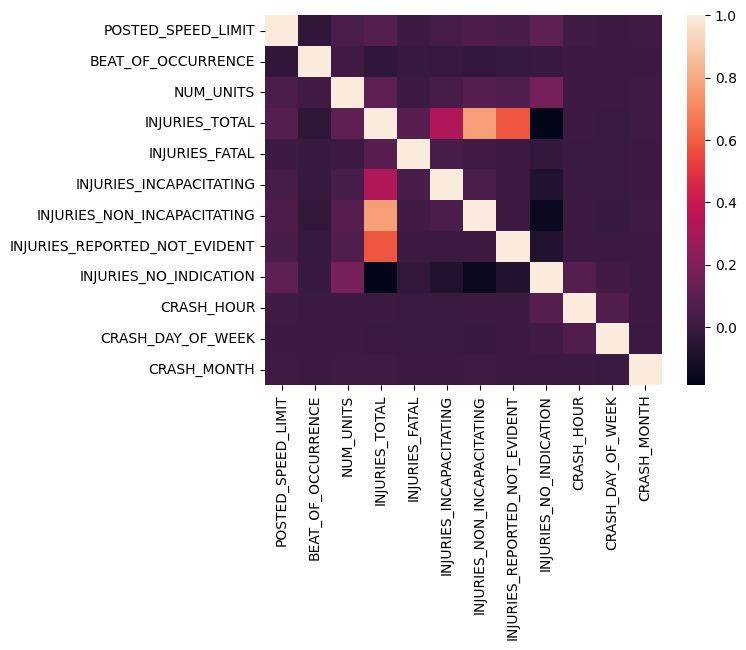

In [44]:
# Are certain factors correlated with severity of injuries?
sns.heatmap(crashes_[crashes_eda].corr());

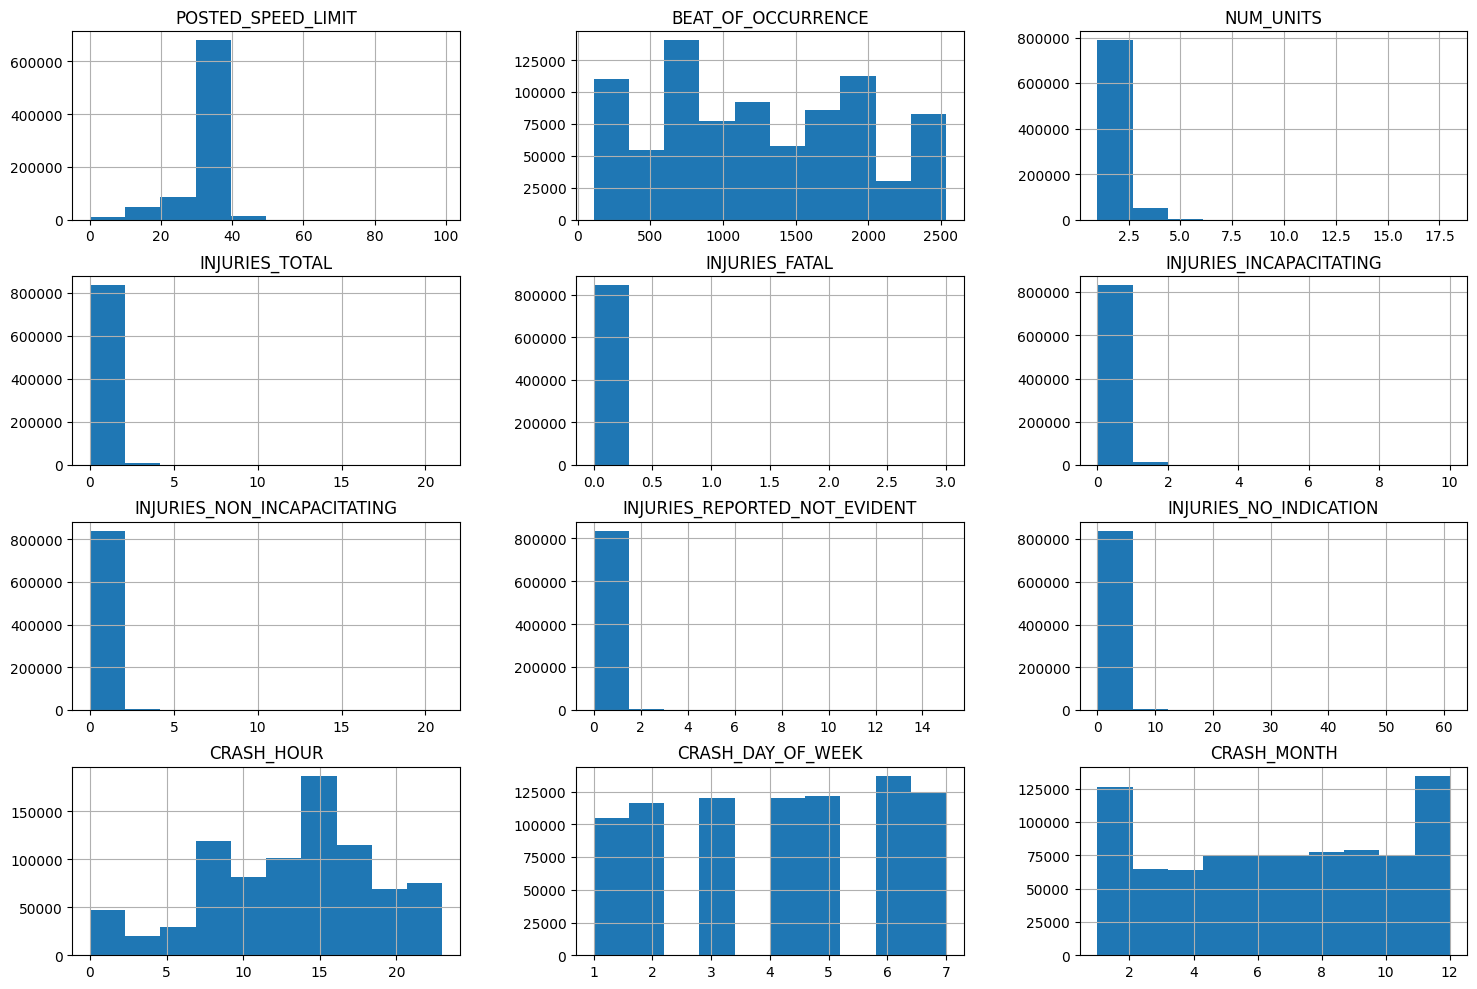

In [45]:
# Numeric variables
crashes_[crashes_eda].hist(figsize=(18, 12));

In [46]:
people_df.INJURY_CLASSIFICATION.value_counts()

INJURY_CLASSIFICATION
NO INDICATION OF INJURY     1761303
NONINCAPACITATING INJURY      95821
REPORTED, NOT EVIDENT         56333
INCAPACITATING INJURY         17549
FATAL                          1065
Name: count, dtype: int64

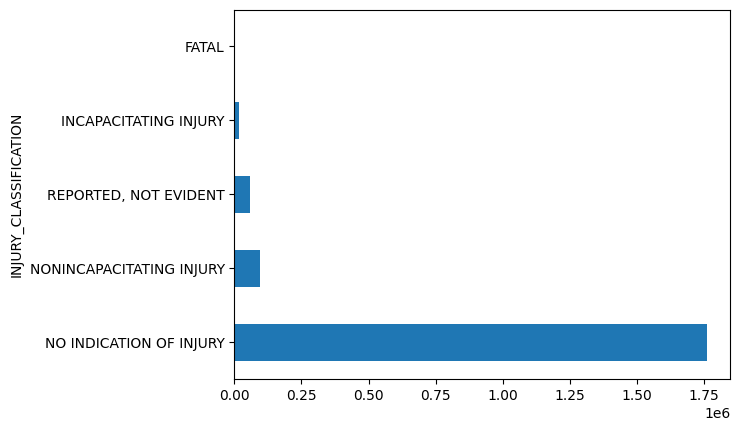

In [47]:
people_df.INJURY_CLASSIFICATION.value_counts().plot.barh();

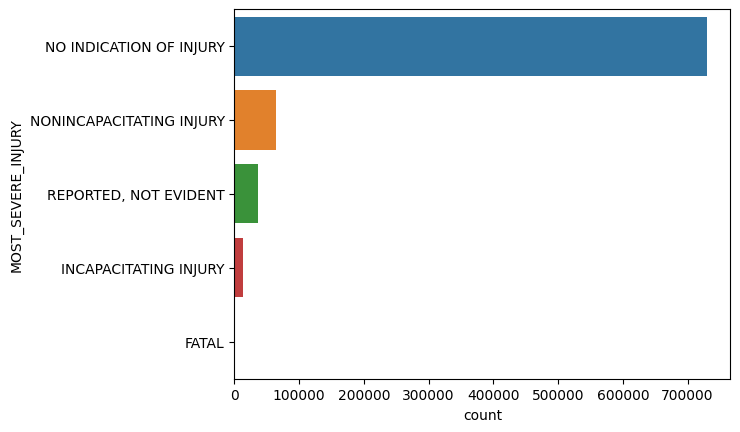

In [48]:
# Target values by crash
sns.barplot(y=crashes_.MOST_SEVERE_INJURY.value_counts().index, 
            x=crashes_.MOST_SEVERE_INJURY.value_counts(),
            orient='h');

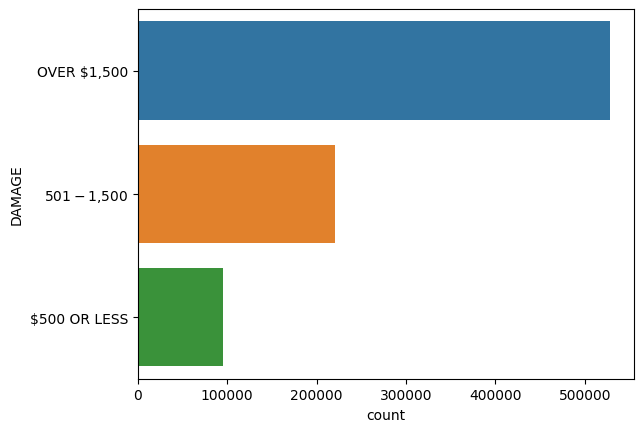

In [49]:
# Total damage in dollars
sns.barplot(y=crashes_.DAMAGE.value_counts().index, x=crashes_.DAMAGE.value_counts(), orient='h');

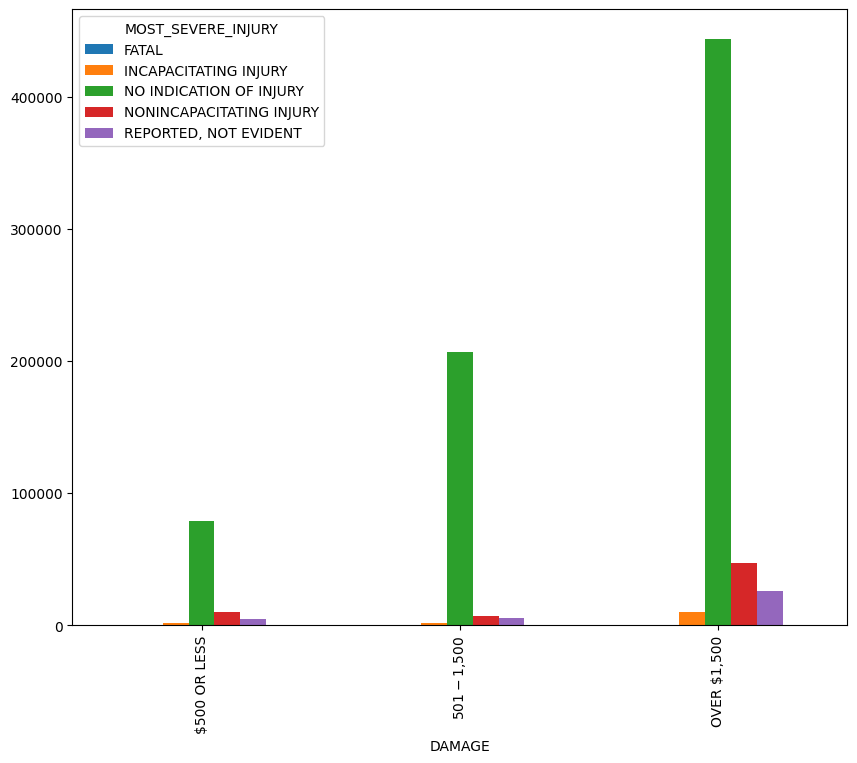

In [50]:
# Total damage disaggregated by most severe injury resulting from a crash
pd.crosstab(crashes_.DAMAGE, crashes_.MOST_SEVERE_INJURY).plot.bar(figsize=(10, 8));

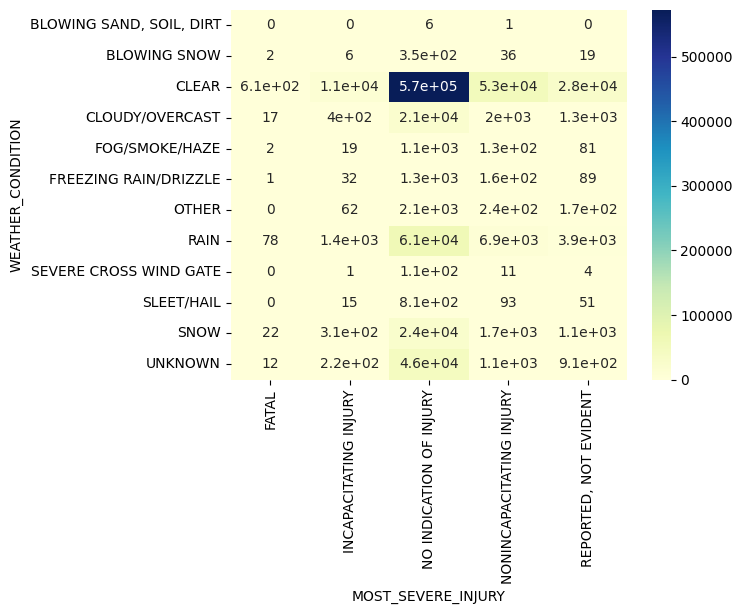

In [51]:
# How might weather affect the severity of injury resulting from a crash?
sns.heatmap(pd.crosstab(crashes_.WEATHER_CONDITION, 
                        crashes_.MOST_SEVERE_INJURY), 
            annot=True, cmap="YlGnBu");

In [52]:
people_ = people_df.drop(['PERSON_ID'], axis=1)

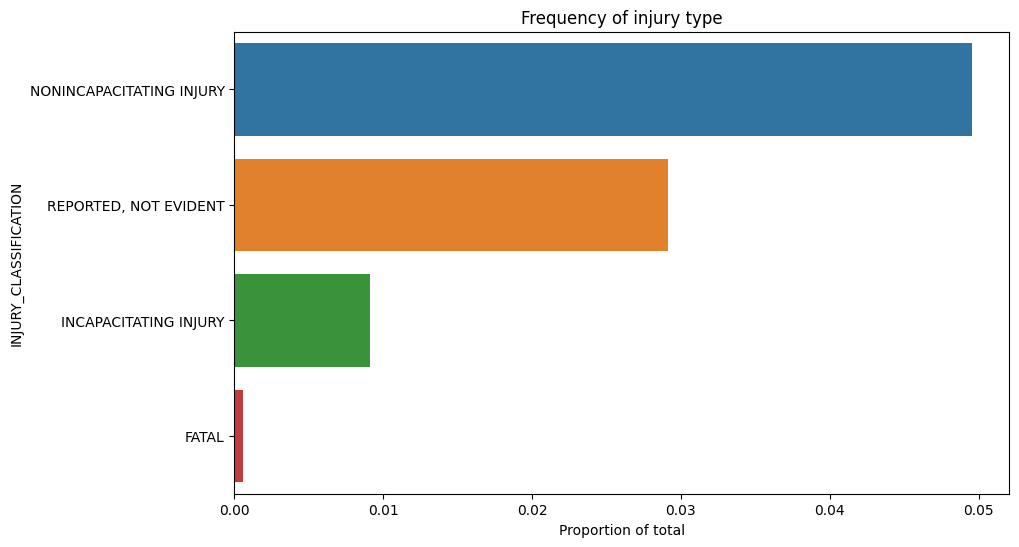

In [53]:
# Distribution of our target classes
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y=people_df.INJURY_CLASSIFICATION.value_counts(normalize=True).drop('NO INDICATION OF INJURY').index, 
            x=people_df.INJURY_CLASSIFICATION.value_counts(normalize=True).drop('NO INDICATION OF INJURY'),
           orient='h', ax=ax)
plt.title('Frequency of injury type')
plt.xlabel('Proportion of total');

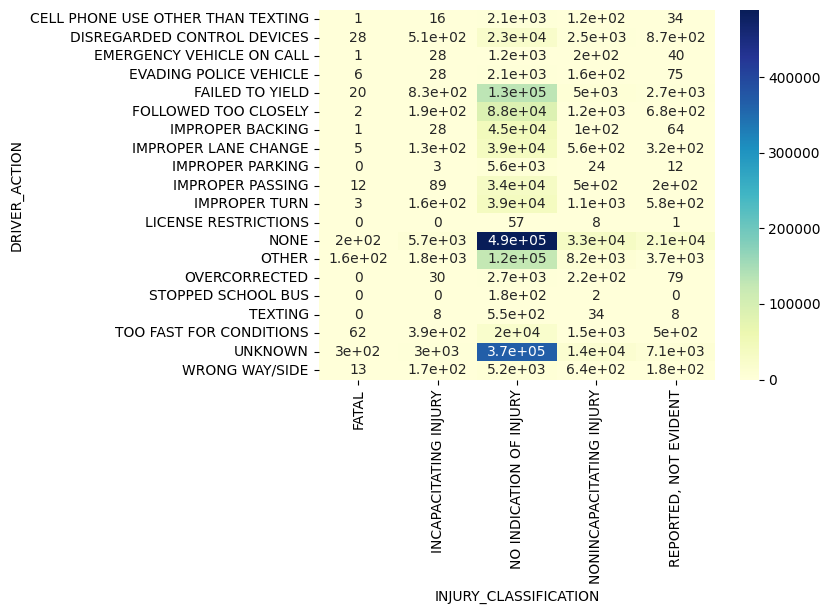

In [54]:
sns.heatmap(pd.crosstab(people_.DRIVER_ACTION, people_.INJURY_CLASSIFICATION),
            annot=True, cmap="YlGnBu");

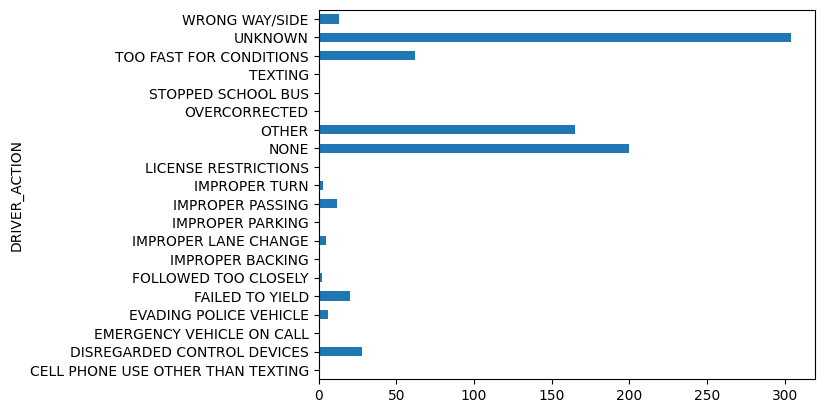

In [55]:
# Driver action with fatalities
pd.crosstab(people_.DRIVER_ACTION, people_.INJURY_CLASSIFICATION)['FATAL'].plot.barh();

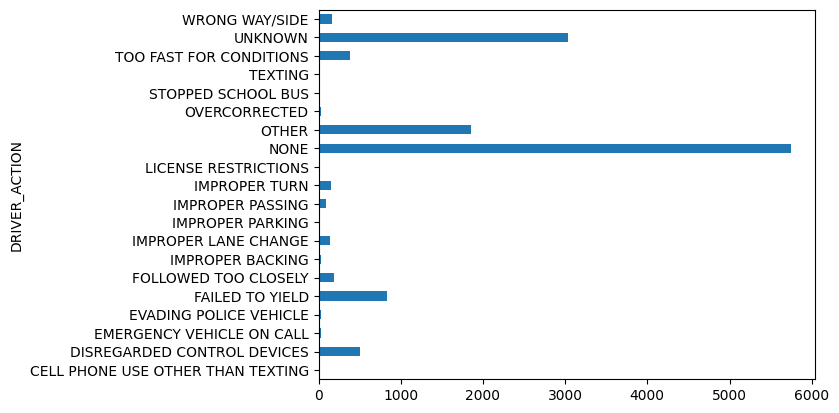

In [56]:
# Driver action with inapacitating injuries
pd.crosstab(people_.DRIVER_ACTION, people_.INJURY_CLASSIFICATION)['INCAPACITATING INJURY'].plot.barh();

In [57]:
# Distribution of breathalyzer tests
people_.BAC_RESULT.value_counts()

BAC_RESULT
TEST NOT OFFERED                   1516974
TEST REFUSED                         15854
TEST PERFORMED, RESULTS UNKNOWN       3660
TEST TAKEN                            2709
Name: count, dtype: int64

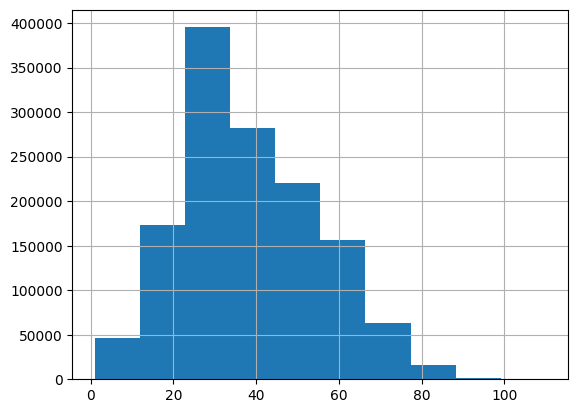

In [58]:
people_df[people_df['AGE'] > 0]['AGE'].hist();

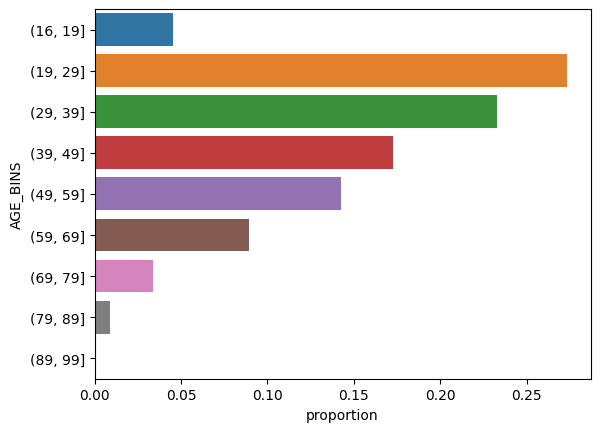

In [59]:
people_df['AGE_BINS'] = pd.cut(x=people_df['AGE'], bins=[16, 19, 29, 39, 49, 59, 69, 79, 89, 99])

sns.barplot(y=people_df.AGE_BINS.value_counts(normalize=True).index, x=people_df.AGE_BINS.value_counts(normalize=True),
           orient='h');

How does Age relate to injury?

In [60]:
pd.crosstab(people_df.AGE_BINS, people_df.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
AGE_BINS,,,,,
"(16, 19]",39,820,49638,4919,2492
"(19, 29]",217,4194,307914,24419,13398
"(29, 39]",190,3292,265783,18308,10878
"(39, 49]",125,2233,199413,12031,7679
"(49, 59]",111,2117,163026,10310,6772
"(59, 69]",88,1485,101631,6894,4128
"(69, 79]",52,652,38704,2608,1447
"(79, 89]",28,226,10310,826,408
"(89, 99]",3,20,1135,100,38


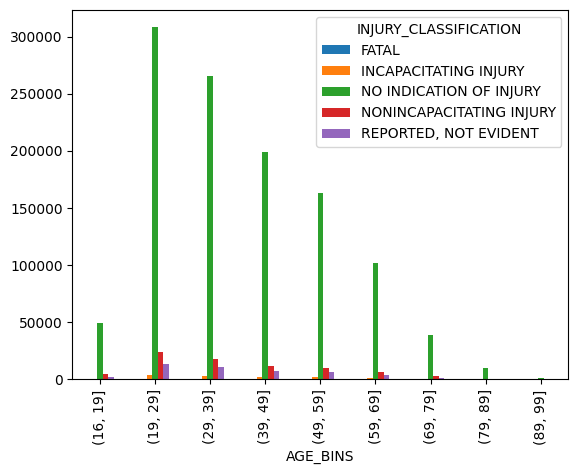

In [61]:
pd.crosstab(people_df.AGE_BINS, people_df.INJURY_CLASSIFICATION).plot.bar();

It appears as though people in their 20s are getting into a lot of wrecks, with all manner of outcomes, with the rate slowing with age. However, we can't conclude from this dataset alone that younger people are more likely to get into crashes. We would need to compare to general driver demographic data to see if this is proportional or not and calculate accident rates.

Our initial models predict that sex is a strong predictor for higher levels of injury/fatalities:

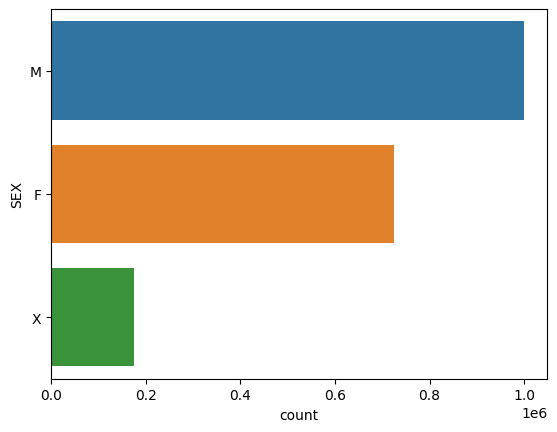

In [62]:
sns.barplot(y=people_df.SEX.value_counts().index, x=people_df.SEX.value_counts(),
           orient='h');

In [63]:
pd.crosstab(people_df.SEX, people_df.INJURY_CLASSIFICATION)

INJURY_CLASSIFICATION,FATAL,INCAPACITATING INJURY,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT"
SEX,,,,,
F,272,7385,643620,45148,29209
M,761,9811,913433,48972,26048
X,14,104,174804,330,204
